# 📘 Student Dropout Prediction – Enhanced Classification Project

This notebook implements classification models to predict student dropout, including visualizations, EDA, model comparison, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_csv("student dropout.csv")
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [3]:

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

In [19]:
df.drop(['School','Address','Family_Size','Parental_Status','Reason_for_Choosing_School',
'Guardian',
'Travel_Time', 
'School_Support',
'Family_Support',
'Extra_Paid_Class',
'Attended_Nursery',  
'Internet_Access',
'In_Relationship',
'Family_Relationship',
'Free_Time',
'Going_Out',
'Health_Status'], axis=1, inplace=True)

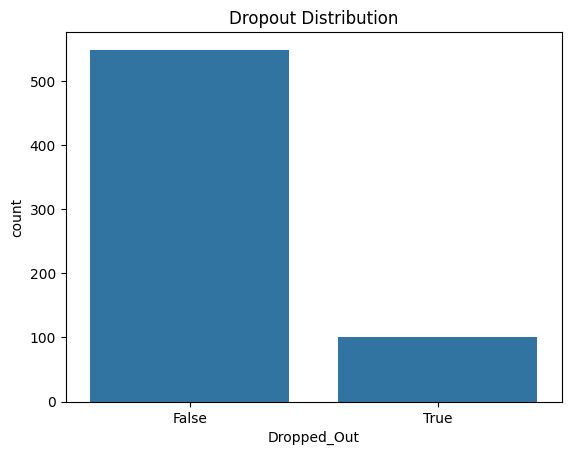

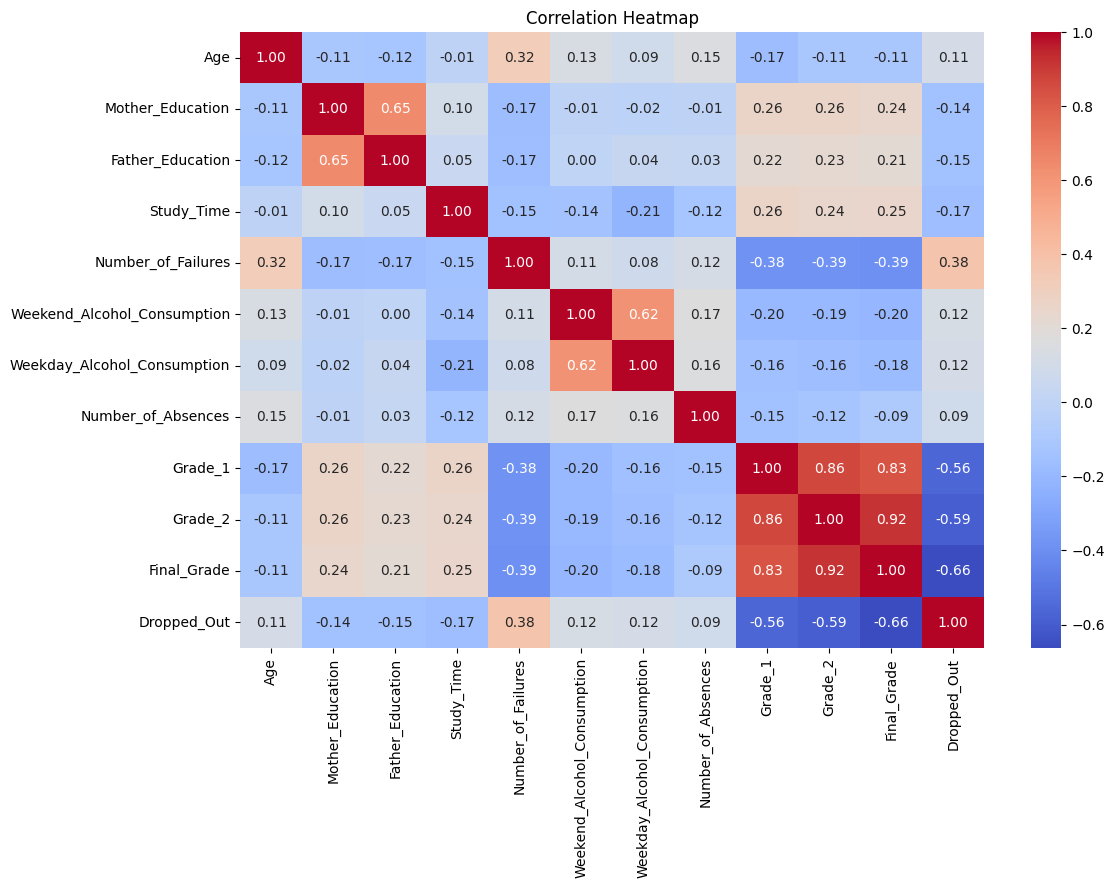

In [20]:
sns.countplot(x='Dropped_Out', data=df)
plt.title("Dropout Distribution")
plt.show()

# Check correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


X = df_encoded.drop('Dropped_Out', axis=1)
y = df_encoded['Dropped_Out']

#
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model: Logistic Regression
Accuracy: 0.9846153846153847
AUC Score: 0.9994202898550725
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       115
        True       1.00      0.87      0.93        15

    accuracy                           0.98       130
   macro avg       0.99      0.93      0.96       130
weighted avg       0.98      0.98      0.98       130



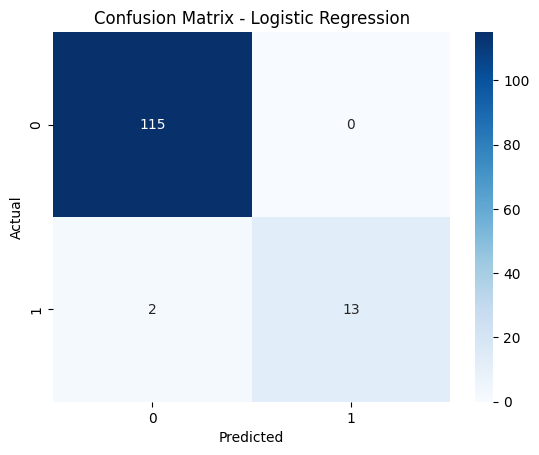

Model: Decision Tree
Accuracy: 1.0
AUC Score: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        15

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



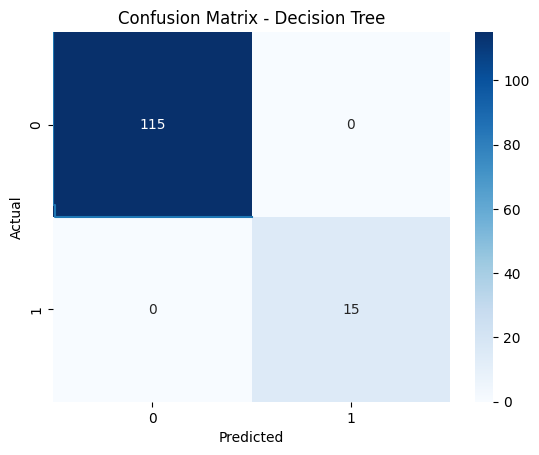

Model: Random Forest
Accuracy: 1.0
AUC Score: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        15

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



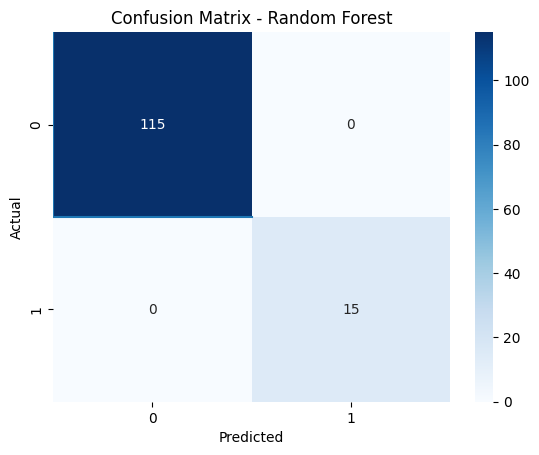

Model: SVM
Accuracy: 0.9461538461538461
AUC Score: 0.9855072463768115
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       115
        True       0.83      0.67      0.74        15

    accuracy                           0.95       130
   macro avg       0.90      0.82      0.86       130
weighted avg       0.94      0.95      0.94       130



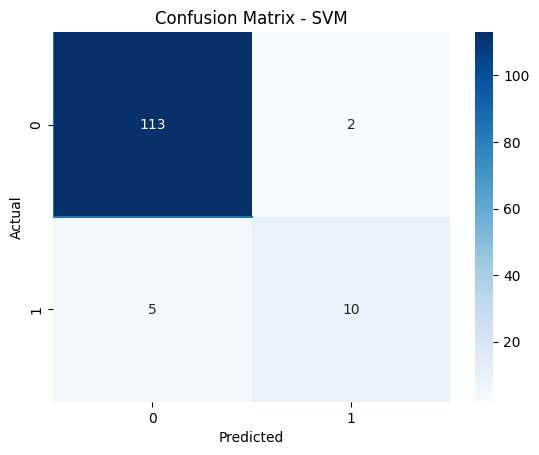

Model: KNN
Accuracy: 0.9153846153846154
AUC Score: 0.9165217391304348
              precision    recall  f1-score   support

       False       0.93      0.98      0.95       115
        True       0.75      0.40      0.52        15

    accuracy                           0.92       130
   macro avg       0.84      0.69      0.74       130
weighted avg       0.91      0.92      0.90       130



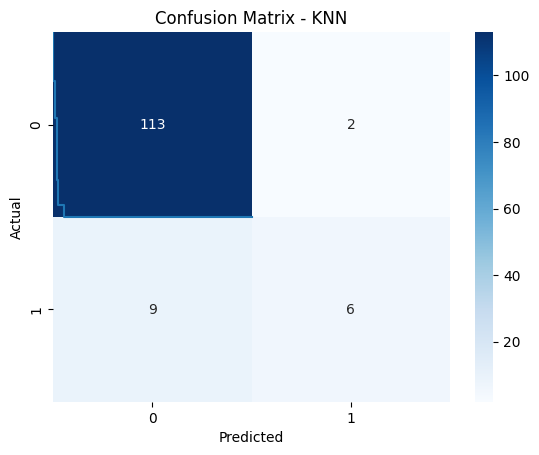

Model: XGBoost
Accuracy: 1.0
AUC Score: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       115
        True       1.00      1.00      1.00        15

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



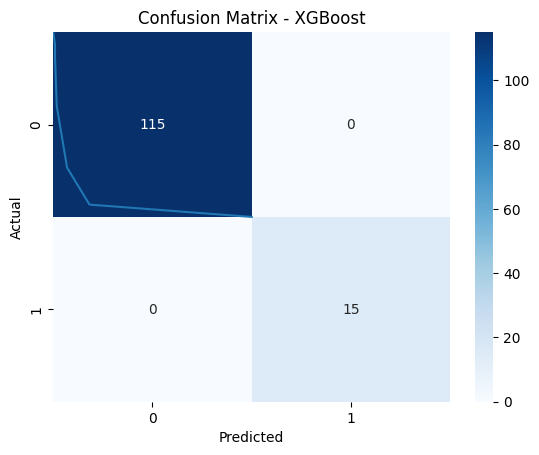

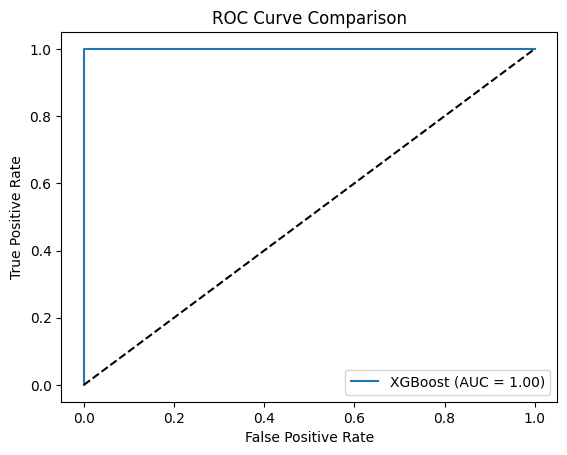

In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "AUC": auc,
        "Confusion Matrix": cm,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

    
    print(f"Model: {name}")
    print(f"Accuracy: {acc}")
    if auc: print(f"AUC Score: {auc}")
    print(classification_report(y_test, y_pred))

   
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

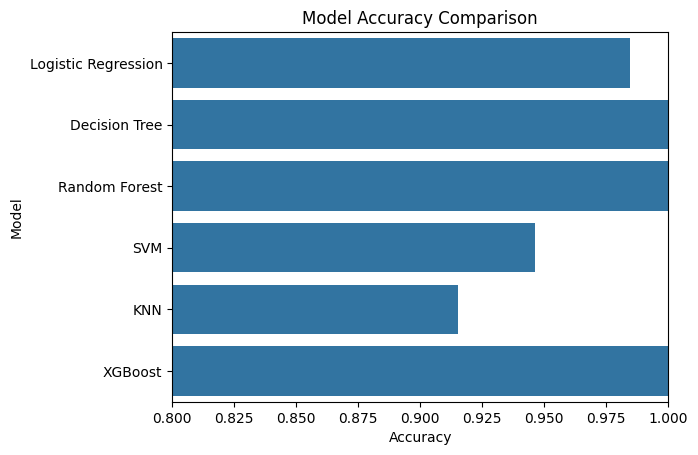

In [23]:
accs = {name: res['Accuracy'] for name, res in results.items()}
sns.barplot(x=list(accs.values()), y=list(accs.keys()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0.8, 1.0)
plt.show()

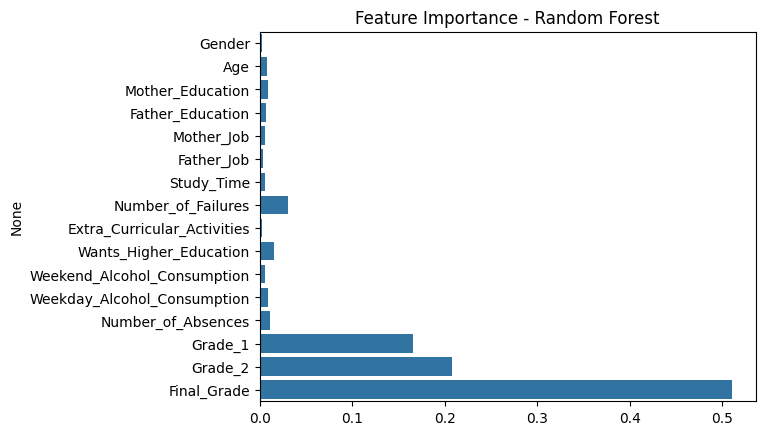

In [24]:
feat_imp = models["Random Forest"].feature_importances_
features = X.columns
sns.barplot(x=feat_imp, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

In [25]:
best_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f"✅ Best Performing Model: {best_model} with Accuracy = {results[best_model]['Accuracy']:.2f}")

✅ Best Performing Model: Decision Tree with Accuracy = 1.00


In [26]:
lg=LogisticRegression()

In [27]:
lg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred=lg.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9846153846153847

In [30]:
import pickle

In [31]:
with open('model.pkl', 'wb') as file:
    pickle.dump(lg, file)

In [39]:
target_col=['Dropped_Out']

In [50]:
imp=X.columns

In [51]:
df

,Gender,Age,Mother_Education,Father_Education,Mother_Job,Father_Job,Study_Time,Number_of_Failures,Extra_Curricular_Activities,Wants_Higher_Education,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,F,18,4,4,at_home,teacher,2,0,no,yes,1,1,4,0,11,11,False
1,F,17,1,1,at_home,other,2,0,no,yes,1,1,2,9,11,11,False
2,F,15,1,1,at_home,other,2,0,no,yes,2,3,6,12,13,12,False
3,F,15,4,2,health,services,3,0,yes,yes,1,1,0,14,14,14,False
4,F,16,3,3,other,other,2,0,no,yes,1,2,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,2,3,services,other,3,1,yes,yes,1,2,4,10,11,10,False
645,F,18,3,1,teacher,services,2,0,no,yes,1,1,4,15,15,16,False
646,F,18,1,1,other,other,2,0,yes,yes,1,1,6,11,12,9,True
647,M,17,3,1,services,services,1,0,no,yes,3,4,6,10,10,10,False


In [52]:
imp

Index(['Gender', 'Age', 'Mother_Education', 'Father_Education', 'Mother_Job',
       'Father_Job', 'Study_Time', 'Number_of_Failures',
       'Extra_Curricular_Activities', 'Wants_Higher_Education',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade'],
      dtype='object')

In [53]:
reduced_df=df[imp]

In [55]:
reduced_df['Dropped_Out']=df['Dropped_Out']

In [56]:
reduced_df

,Gender,Age,Mother_Education,Father_Education,Mother_Job,Father_Job,Study_Time,Number_of_Failures,Extra_Curricular_Activities,Wants_Higher_Education,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,F,18,4,4,at_home,teacher,2,0,no,yes,1,1,4,0,11,11,False
1,F,17,1,1,at_home,other,2,0,no,yes,1,1,2,9,11,11,False
2,F,15,1,1,at_home,other,2,0,no,yes,2,3,6,12,13,12,False
3,F,15,4,2,health,services,3,0,yes,yes,1,1,0,14,14,14,False
4,F,16,3,3,other,other,2,0,no,yes,1,2,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,2,3,services,other,3,1,yes,yes,1,2,4,10,11,10,False
645,F,18,3,1,teacher,services,2,0,no,yes,1,1,4,15,15,16,False
646,F,18,1,1,other,other,2,0,yes,yes,1,1,6,11,12,9,True
647,M,17,3,1,services,services,1,0,no,yes,3,4,6,10,10,10,False


In [57]:
reduced_df.to_csv("reduced_student_dropout.csv", index=False)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       115
        True       1.00      0.87      0.93        15

    accuracy                           0.98       130
   macro avg       0.99      0.93      0.96       130
weighted avg       0.98      0.98      0.98       130



In [65]:
df['Dropped_Out'].value_counts()

Dropped_Out
False    549
True     100
Name: count, dtype: int64

In [67]:
df.shape

(649, 17)

In [81]:
new=np.array([0,18,1,1,2,2,2,0,1,1,1,1,6,11,12,9]).reshape(1,-1)
lg.predict(new)

array([False])

In [80]:
df_encoded

,Gender,Age,Mother_Education,Father_Education,Mother_Job,Father_Job,Study_Time,Number_of_Failures,Extra_Curricular_Activities,Wants_Higher_Education,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,18,4,4,0,4,2,0,0,1,1,1,4,0,11,11,False
1,0,17,1,1,0,2,2,0,0,1,1,1,2,9,11,11,False
2,0,15,1,1,0,2,2,0,0,1,2,3,6,12,13,12,False
3,0,15,4,2,1,3,3,0,1,1,1,1,0,14,14,14,False
4,0,16,3,3,2,2,2,0,0,1,1,2,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,2,3,3,2,3,1,1,1,1,2,4,10,11,10,False
645,0,18,3,1,4,3,2,0,0,1,1,1,4,15,15,16,False
646,0,18,1,1,2,2,2,0,1,1,1,1,6,11,12,9,True
647,1,17,3,1,3,3,1,0,0,1,3,4,6,10,10,10,False


In [87]:
dt=DecisionTreeClassifier()

In [88]:
dt

DecisionTreeClassifier()

In [90]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred=dt.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

1.0

In [93]:
dt.predict(new)

array([False])

In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


In [112]:
X_train.shape

(878, 16)

In [114]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [115]:

# Evaluate model
y_pred = model3.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       114
        True       1.00      1.00      1.00       106

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [116]:
feature_importances = model.feature_importances_

In [117]:
feature_importances

array([0.00075284, 0.00443032, 0.01016514, 0.01098854, 0.00457195,
       0.00446368, 0.0144011 , 0.01422241, 0.00441886, 0.0566075 ,
       0.00235225, 0.00598977, 0.00467345, 0.16973268, 0.22205181,
       0.47017771])

In [118]:
model3.predict(new)

array([ True])

In [119]:
with open('random.pkl', 'wb') as file:
    pickle.dump(model3, file)

In [120]:
with open("random.pkl", "rb") as f:
    model = pickle.load(f)

In [121]:
model

RandomForestClassifier(random_state=42)